In [8]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/elianakwok/anaconda3/lib/python311.zip', '/Users/elianakwok/anaconda3/lib/python3.11', '/Users/elianakwok/anaconda3/lib/python3.11/lib-dynload', '', '/Users/elianakwok/.venvs/b1-scientific-coding/lib/python3.11/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

['/Users/elianakwok/anaconda3/lib/python311.zip', '/Users/elianakwok/anaconda3/lib/python3.11', '/Users/elianakwok/anaconda3/lib/python3.11/lib-dynload', '', '/Users/elianakwok/.venvs/b1-scientific-coding/lib/python3.11/site-packages', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_mission', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_mission', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_mission', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_mission', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_mission', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_mission', '/Users/elianakwok/Documents/Oxford/Course/Year 3/B1/Scientific Coding/b1-coding-practical-mt24/uuv_miss

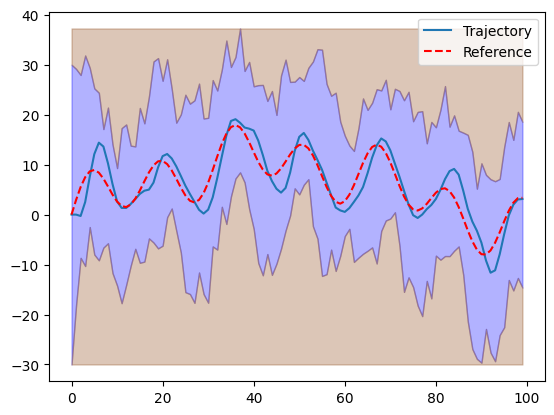

In [10]:
import sys
import os

sys.path.append(os.path.abspath('../uuv_mission'))
print(sys.path)

import dynamic
from controller import pd_controller

sub = dynamic.Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = dynamic.ClosedLoop(sub, pd_controller)
mission = dynamic.Mission.from_csv('../data/mission.csv') # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

In [55]:
def pd_controller(references, depths):

    kp = 0.15
    kd = 0.6
    error_1 = references[1] - depths[1, 0] # error at time t
    error_0 = references[0] - depths[0, 0] # error at time t-1
    control_action = kp * error_0 + kd * (error_0 - error_1)

    return control_action

In [54]:
import numpy as np

positions = np.zeros((10, 2))
i = 0
for pos in positions:
    pos = (i, i+10)
    positions[i] = pos
    print(pos)
    i = i+1
print(positions[1:5])

(0, 10)
(1, 11)
(2, 12)
(3, 13)
(4, 14)
(5, 15)
(6, 16)
(7, 17)
(8, 18)
(9, 19)
[[ 1. 11.]
 [ 2. 12.]
 [ 3. 13.]
 [ 4. 14.]]
